### Based on the work done during Exploratory Analysis, we have concluded that the predictor variables that might have the greatest impact on price are:#### 
Room Ty, e
Property T, pe
Number of Bedr, oms
Amen, ties
Number of Raframe.

In [40]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
df =  pd.read_csv('listings.csv')


In [5]:
new_df = df[['room_type','property_type','bedrooms','amenities','number_of_reviews', 'price']]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   room_type          3818 non-null   object 
 1   property_type      3817 non-null   object 
 2   bedrooms           3812 non-null   float64
 3   amenities          3818 non-null   object 
 4   number_of_reviews  3818 non-null   int64  
 5   price              3818 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 179.1+ KB


## Data Preprocessing

### 1. Preparing Amenities

In [22]:
new_df.amenities.value_counts()

AttributeError: 'DataFrame' object has no attribute 'amenities'

In [8]:
# Separating the different amenities and creating a dedicated column for each amenity
# Creating a set of all possible amenities
amenities_list = list(new_df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

In [9]:
# Creating column variables for each of the different amenities and adding them into the original dataframe
new_df.loc[new_df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
new_df.loc[new_df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
new_df.loc[new_df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
new_df.loc[new_df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
new_df.loc[new_df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
new_df.loc[new_df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
new_df.loc[new_df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
new_df.loc[new_df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
new_df.loc[new_df['amenities'].str.contains('TV'), 'tv'] = 1
new_df.loc[new_df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
new_df.loc[new_df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
new_df.loc[new_df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
new_df.loc[new_df['amenities'].str.contains('Elevator'), 'elevator'] = 1
new_df.loc[new_df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
new_df.loc[new_df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
new_df.loc[new_df['amenities'].str.contains('parking'), 'parking'] = 1
new_df.loc[new_df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
new_df.loc[new_df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
new_df.loc[new_df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
new_df.loc[new_df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
new_df.loc[new_df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
new_df.loc[new_df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
new_df.loc[new_df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
new_df.loc[new_df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
new_df.loc[new_df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
new_df.loc[new_df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
new_df.loc[new_df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
new_df.loc[new_df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

/tmp/ipykernel_190/2065093736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[new_df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
/tmp/ipykernel_190/2065093736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[new_df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
/tmp/ipykernel_190/2065093736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [10]:
print(new_df.columns)

Index(['room_type', 'property_type', 'bedrooms', 'amenities',
       'number_of_reviews', 'price', 'check_in_24h', 'air_conditioning',
       'high_end_electronics', 'bbq', 'balcony', 'nature_and_views',
       'bed_linen', 'breakfast', 'tv', 'coffee_machine', 'cooking_basics',
       'white_goods', 'elevator', 'gym', 'child_friendly', 'parking',
       'outdoor_space', 'host_greeting', 'hot_tub_sauna_or_pool', 'internet',
       'long_term_stays', 'pets_allowed', 'private_entrance', 'secure',
       'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable'],
      dtype='object')


In [11]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = new_df.iloc[:,41:].columns
new_df[cols_to_replace_nulls] = new_df[cols_to_replace_nulls].fillna(0)

# Dropping the original amenities variable
new_df.drop('amenities', axis=1, inplace=True)

/tmp/ipykernel_190/2551060599.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('amenities', axis=1, inplace=True)


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              3818 non-null   object 
 1   property_type          3817 non-null   object 
 2   bedrooms               3812 non-null   float64
 3   number_of_reviews      3818 non-null   int64  
 4   price                  3818 non-null   object 
 5   check_in_24h           0 non-null      float64
 6   air_conditioning       0 non-null      float64
 7   high_end_electronics   0 non-null      float64
 8   bbq                    0 non-null      float64
 9   balcony                0 non-null      float64
 10  nature_and_views       0 non-null      float64
 11  bed_linen              0 non-null      float64
 12  breakfast              291 non-null    float64
 13  tv                     2741 non-null   float64
 14  coffee_machine         0 non-null      float64
 15  cook

In [17]:
# Removing the amenities which have all NULL values for all listings
new_df = new_df.dropna(axis=1, how='all')

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              3818 non-null   object 
 1   property_type          3817 non-null   object 
 2   bedrooms               3812 non-null   float64
 3   number_of_reviews      3818 non-null   int64  
 4   price                  3818 non-null   object 
 5   breakfast              291 non-null    float64
 6   tv                     2741 non-null   float64
 7   white_goods            3134 non-null   float64
 8   elevator               785 non-null    float64
 9   gym                    442 non-null    float64
 10  hot_tub_sauna_or_pool  159 non-null    float64
 11  internet               3692 non-null   float64
 12  pets_allowed           1169 non-null   float64
 13  secure                 727 non-null    float64
 14  accessible             300 non-null    float64
dtypes: f

### 2.Preparing Property type

In [21]:
# Checking to see the total number of each type of property 
new_df.property_type.value_counts()

property_type
House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: count, dtype: int64

In [23]:
# Grouping property types with less than <30 count into 'Other'
new_df.loc[~new_df.property_type.isin(['House', 'Apartment','Townhouse','Condominium','Loft',"Bed & Breakfast"]), 'property_type'] = 'Other'
new_df.property_type.value_counts()

property_type
House              1733
Apartment          1708
Townhouse           118
Other                91
Condominium          91
Loft                 40
Bed & Breakfast      37
Name: count, dtype: int64

### 3.Preparing Price

In [24]:
new_df.head()

,room_type,property_type,bedrooms,number_of_reviews,price,breakfast,tv,white_goods,elevator,gym,hot_tub_sauna_or_pool,internet,pets_allowed,secure,accessible
0,Entire home/apt,Apartment,1.0,207,$85.00,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,Entire home/apt,Apartment,1.0,43,$150.00,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
2,Entire home/apt,House,5.0,20,$975.00,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN
3,Entire home/apt,Apartment,0.0,0,$100.00,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
4,Entire home/apt,House,3.0,38,$450.00,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [26]:
# Remove the $ sign and the two zeroes and dot and remove any ","
new_df.price = new_df.price.str[1:-3]
new_df.price = new_df.price.str.replace(",", "")
new_df.price = new_df.price.astype('int64')
new_df.info()

AttributeError: Can only use .str accessor with string values!

In [27]:
# To convert NaN values to 0 for preparation for Modelling
new_df = new_df.fillna(0)
# Checking to ensure that there are no NULL entries
new_df.isnull().sum()

room_type                0
property_type            0
bedrooms                 0
number_of_reviews        0
price                    0
breakfast                0
tv                       0
white_goods              0
elevator                 0
gym                      0
hot_tub_sauna_or_pool    0
internet                 0
pets_allowed             0
secure                   0
accessible               0
dtype: int64

## 4.Encoding and Preparation

In [28]:
# One-hot encode the Categorial variables
transformedDF = pd.get_dummies(new_df, columns=['room_type','property_type'])

#renaming some categories to remove '/' and blank spaces
newTransformedDF = transformedDF.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Private room': 'room_type_Private_room'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})
newTransformedDF =newTransformedDF.rename(columns={'property_type_Bed & Breakfast': 'property_type_Bed_and_Breakfast'})

newTransformedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   bedrooms                         3818 non-null   float64
 1   number_of_reviews                3818 non-null   int64  
 2   price                            3818 non-null   int64  
 3   breakfast                        3818 non-null   float64
 4   tv                               3818 non-null   float64
 5   white_goods                      3818 non-null   float64
 6   elevator                         3818 non-null   float64
 7   gym                              3818 non-null   float64
 8   hot_tub_sauna_or_pool            3818 non-null   float64
 9   internet                         3818 non-null   float64
 10  pets_allowed                     3818 non-null   float64
 11  secure                           3818 non-null   float64
 12  accessible          

## 5.Standardization of variables

In [32]:
# Separating X and y for Modelling
#Predictor Variables
X = pd.DataFrame(newTransformedDF[["bedrooms", "breakfast", "tv", "white_goods", "elevator", "gym", "hot_tub_sauna_or_pool",
                              "internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private_room", "room_type_Shared_room", "property_type_Apartment",
                              "property_type_Bed_and_Breakfast", "property_type_Condominium", "property_type_House",
                              "property_type_Loft", "property_type_Other", "property_type_Townhouse"]]) 
#Response Variables
y = pd.DataFrame(newTransformedDF["price"]) 

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [33]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 6.Linear Regression

In [36]:
# Regression Problem : Price = (Predictor Variables)*a(i) +b where i from 0 to predictors number
# Creating and fitting the model
linreg = LinearRegression()     
linreg.fit(X_train, y_train)


LinearRegression()

In [37]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [127.52693541]

                         Predictors  Coefficients
0                          bedrooms  5.170432e+01
1                         breakfast -6.964613e-02
2                                tv  1.872204e+00
3                       white_goods -4.338716e-01
4                          elevator  9.517720e+00
5                               gym  2.149142e+00
6             hot_tub_sauna_or_pool  1.835134e+00
7                          internet -1.589165e+00
8                      pets_allowed -2.240338e+00
9                            secure  4.771624e-01
10                       accessible  1.771345e-02
11                number_of_reviews -4.410385e+00
12        room_type_Entire_home_apt  4.471975e+14
13           room_type_Private_room  4.359212e+14
14            room_type_Shared_room  1.633631e+14
15          property_type_Apartment -6.552123e+14
16  property_type_Bed_and_Breakfast -1.290925e+14
17        property_type_Condominium -2.010006e+14
18

In [38]:
# Predict Response corresponding to Predictors
trainPredictionLR = linreg.predict(X_train)
testPredictionLR = linreg.predict(X_test)

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

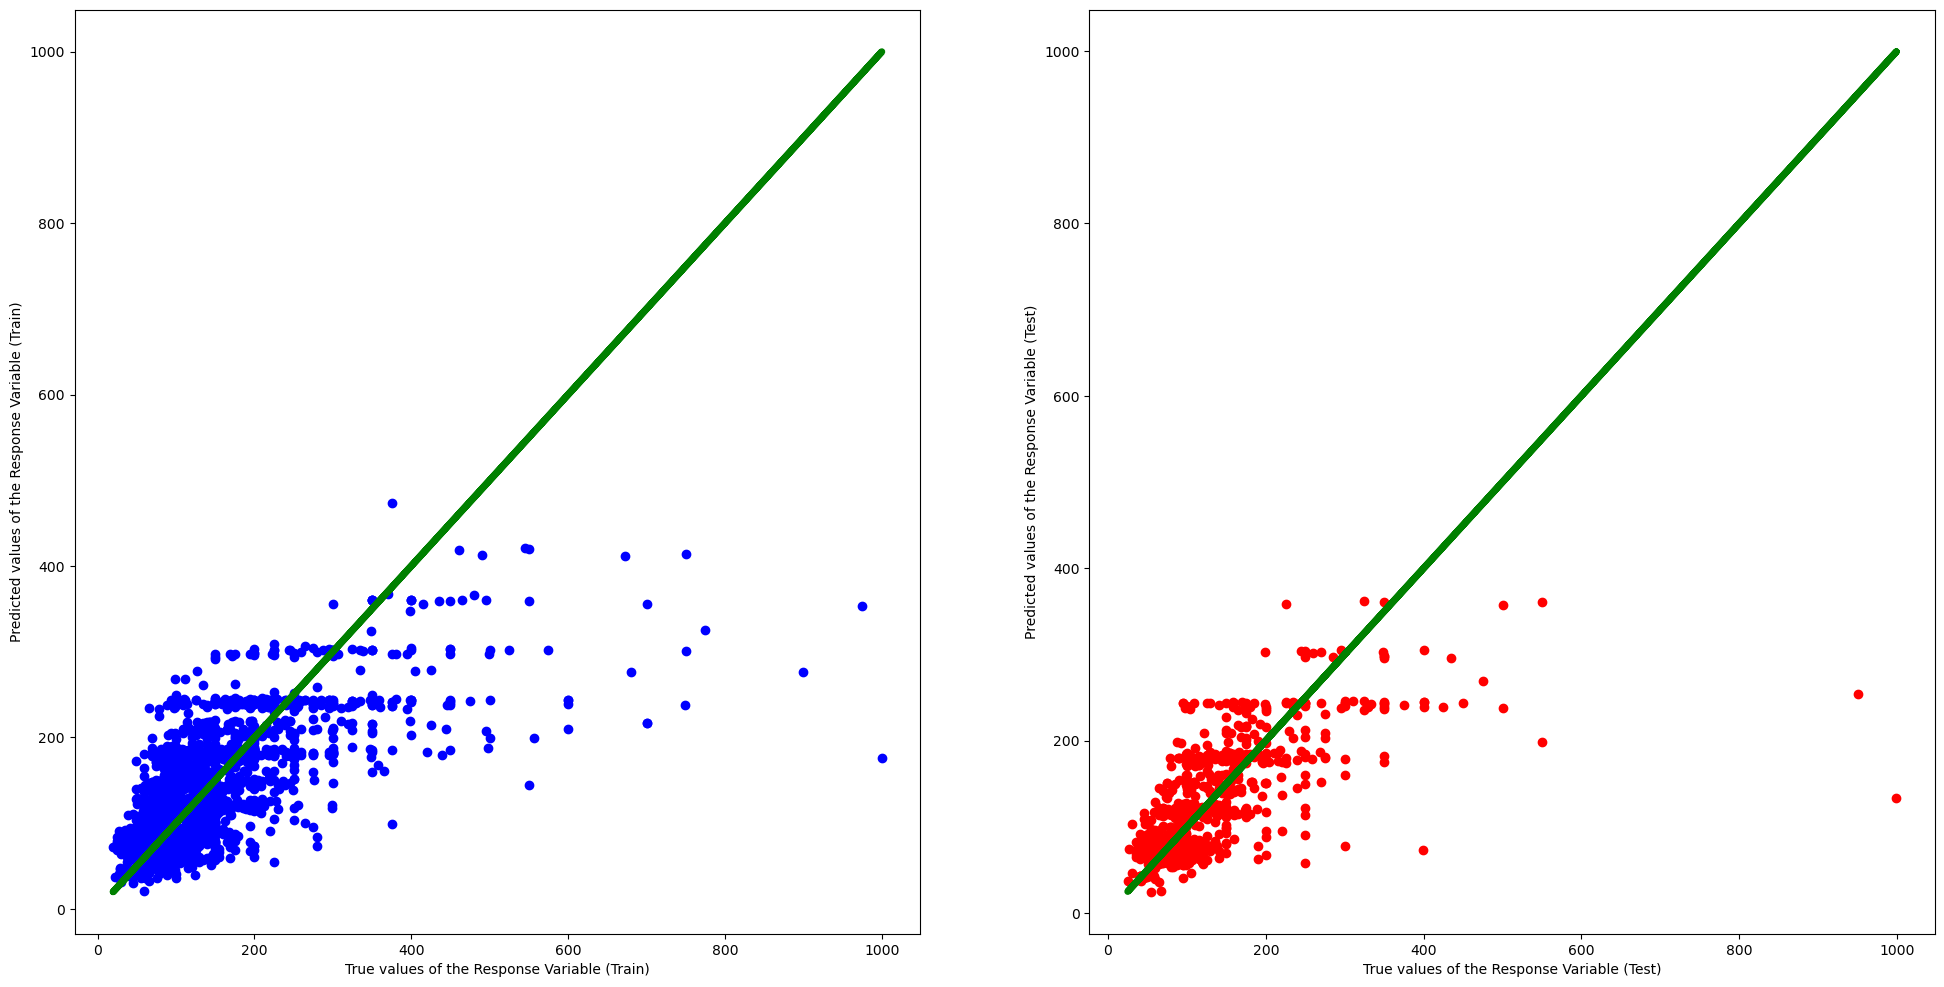

In [41]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

#### Points that lie on or near the diagonal line means that the values predicted by the Linear Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.